Files already downloaded and verified
Files already downloaded and verified


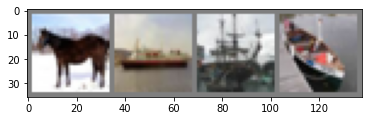

horse ship  ship  ship 


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [6]:
def acc(n,testloader):

    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = n(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
    return correct/total

In [7]:
import torch.nn as nn
import torch.nn.functional as F

class Neto(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        
        x = F.relu(self.fc1(x))
        
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [14]:
acctest= []
acctrain= []
neto = Neto()
import numpy as np
import torch.optim as optim
from torchvision.transforms import AutoAugment as autoaugment
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(neto.parameters(), lr=0.001, momentum=0.9)


for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = neto(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        inputs=inputs*(1+np.random.rand()/10)
            
        optimizer.zero_grad()
        outputs = neto(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    
    acctest.append(acc(neto,testloader))
    acctrain.append(acc(neto,trainloader))
    print('test',acctest)
    print('train',acctrain)
print('Finished Training')

[1,  2000] loss: 2.065
[1,  4000] loss: 1.697
[1,  6000] loss: 1.571
[1,  8000] loss: 1.500
[1, 10000] loss: 1.480
[1, 12000] loss: 1.399
Accuracy of the network on the 10000 test images: 48 %
Accuracy of the network on the 10000 test images: 49 %
test [0.4818]
train [0.49518]
[2,  2000] loss: 1.364
[2,  4000] loss: 1.333
[2,  6000] loss: 1.329
[2,  8000] loss: 1.276
[2, 10000] loss: 1.285
[2, 12000] loss: 1.268
Accuracy of the network on the 10000 test images: 54 %
Accuracy of the network on the 10000 test images: 57 %
test [0.4818, 0.5493]
train [0.49518, 0.57012]
[3,  2000] loss: 1.180
[3,  4000] loss: 1.189
[3,  6000] loss: 1.192
[3,  8000] loss: 1.176
[3, 10000] loss: 1.167
[3, 12000] loss: 1.195
Accuracy of the network on the 10000 test images: 56 %
Accuracy of the network on the 10000 test images: 59 %
test [0.4818, 0.5493, 0.5646]
train [0.49518, 0.57012, 0.59658]
[4,  2000] loss: 1.107
[4,  4000] loss: 1.105
[4,  6000] loss: 1.092
[4,  8000] loss: 1.132
[4, 10000] loss: 1.121


In [15]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.drop=nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [18]:
accDroptest= []
accDroptrain= []
net = Net()
import numpy as np
import torch.optim as optim
from torchvision.transforms import AutoAugment as autoaugment
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        inputs=inputs*(1+np.random.rand()/200)
            
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    
    accDroptest.append(acc(neto,testloader))
    accDroptrain.append(acc(neto,trainloader))
    print('test',accDroptest)
    print('train',accDroptrain)
print('Finished Training')

[1,  2000] loss: 2.188
[1,  4000] loss: 1.889
[1,  6000] loss: 1.697
[1,  8000] loss: 1.609
[1, 10000] loss: 1.561
[1, 12000] loss: 1.513
Accuracy of the network on the 10000 test images: 55 %
Accuracy of the network on the 10000 test images: 67 %
test [0.559]
train [0.67374]
[2,  2000] loss: 1.454
[2,  4000] loss: 1.436
[2,  6000] loss: 1.442
[2,  8000] loss: 1.440
[2, 10000] loss: 1.424
[2, 12000] loss: 1.407
Accuracy of the network on the 10000 test images: 55 %
Accuracy of the network on the 10000 test images: 67 %
test [0.559, 0.559]
train [0.67374, 0.67374]
[3,  2000] loss: 1.351
[3,  4000] loss: 1.345
[3,  6000] loss: 1.352
[3,  8000] loss: 1.328
[3, 10000] loss: 1.348
[3, 12000] loss: 1.334
Accuracy of the network on the 10000 test images: 55 %
Accuracy of the network on the 10000 test images: 67 %
test [0.559, 0.559, 0.559]
train [0.67374, 0.67374, 0.67374]
[4,  2000] loss: 1.272
[4,  4000] loss: 1.310
[4,  6000] loss: 1.285
[4,  8000] loss: 1.298
[4, 10000] loss: 1.304
[4, 12